In [1]:
import pandas as pd
import numpy as np
import hdbscan

In [2]:
data_kerja = pd.read_csv("data_angkatankerja.csv", delimiter=";")
data_kerja

,kode,Provinsi,Usia Produktif,<= SD/MI,SMP/MTS,SMA/SMK,Perguruan Tinggi,Primer,Sekunder,Tersier
0,11,Aceh,2552562,716751,507083,941526,387202,991662,343409,415467
1,12,Sumatera Utara,7669870,1933587,1527752,3259867,948664,2526663,1189921,1722162
2,13,Sumatera Barat,2868270,928563,498879,981467,459361,978093,361346,674181
3,14,Riau,3313818,1100210,577105,1192689,443814,1301185,420364,711412
4,15,Jambi,1884278,707118,354611,599023,223526,918916,185364,344126
5,16,Sumatera Selatan,4497960,1847674,779819,1379954,490513,2067293,490798,876788
6,17,Bengkulu,1076115,405690,193296,319701,157428,510762,105815,208524
7,18,Lampung,4595931,1820933,1066933,1315961,392104,1931264,651745,1060170
8,19,Kepulauan Bangka Belitung,767603,323787,109364,241183,93269,322068,85832,156472
9,21,Kepulauan Riau,1259712,255306,157923,661878,184605,99750,386094,302484


In [3]:
meta = data_kerja[['kode', 'Provinsi']]

In [4]:
data_numeric = data_kerja.drop(columns=['kode', 'Provinsi'])

## **EDA**

In [5]:
# Statistik deskriptif hanya untuk kolom numerik
statistik = data_numeric.describe().transpose()
statistik

,count,mean,std,min,25%,50%,75%,max
Usia Produktif,34.0,4.227137e+06,6.109894e+06,370012.0,1246494.00,2266163.0,4201924.50,25578174.0
<= SD/MI,34.0,1.601385e+06,2.545071e+06,125911.0,375021.00,711934.5,1433132.50,10020225.0
SMP/MTS,34.0,7.419249e+05,1.134869e+06,52390.0,198495.50,360863.5,647920.75,4508910.0
SMA/SMK,34.0,1.368986e+06,1.888148e+06,126979.0,394844.00,734797.5,1285143.00,8578904.0
Perguruan Tinggi,34.0,5.148401e+05,6.336458e+05,64732.0,169568.00,288581.5,482725.00,2936069.0
Primer,34.0,1.183357e+06,1.429721e+06,42479.0,334504.75,713449.0,1377707.50,6874713.0
Sekunder,34.0,8.375300e+05,1.554631e+06,46534.0,130971.75,319291.5,585474.75,6440922.0
Tersier,34.0,1.018669e+06,1.592990e+06,76182.0,222094.50,475875.5,837361.25,7270910.0


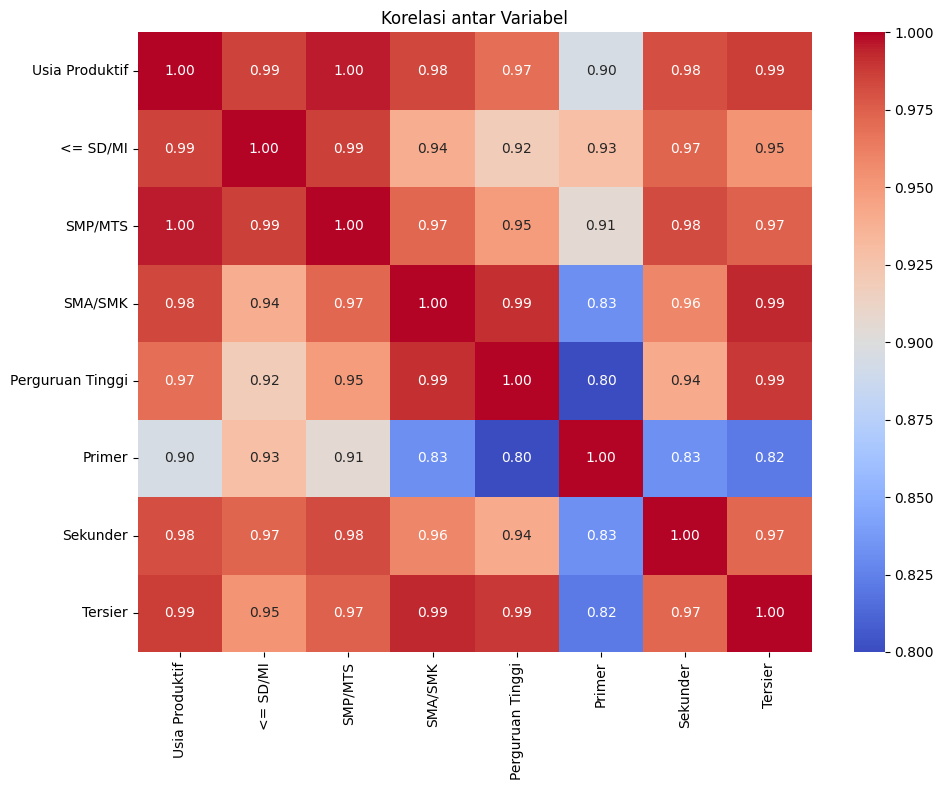

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Korelasi antar variabel numerik
corr = data_numeric.corr()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Variabel")
plt.tight_layout()
plt.show()

In [7]:
# # Plot per tingkat pendidikan
# dataset = data_kerja.copy()
# pendidikan_cols = ['<= SD/MI', 'SMP/MTS', 'SMA/SMK', 'Perguruan Tinggi']
# df_pendidikan = dataset[['Provinsi'] + pendidikan_cols].set_index('Provinsi')

# df_pendidikan.plot(kind='bar', stacked=True, figsize=(14, 7))
# plt.title("Distribusi Pendidikan Penduduk Usia Produktif per Provinsi")
# plt.ylabel("Jumlah Penduduk")
# plt.xlabel("Provinsi")
# plt.xticks(rotation=90)
# plt.legend(title="Tingkat Pendidikan")
# plt.tight_layout()
# plt.show()

In [8]:
# # Hitung total pendidikan
# dataset['Total Pendidikan'] = dataset[pendidikan_cols].sum(axis=1)

# # Tambahkan persentase setiap kategori pendidikan
# for col in pendidikan_cols:
#     dataset[f'% {col}'] = (dataset[col] / dataset['Total Pendidikan']) * 100

# # Buat tabel ringkasan
# tabel_pendidikan = dataset[['Provinsi'] + pendidikan_cols + [f'% {col}' for col in pendidikan_cols]]

# # Tampilkan tabel
# pd.set_option('display.float_format', '{:,.2f}'.format)  # tampilkan angka dengan 2 desimal
# tabel_pendidikan

In [9]:
# sektor_cols = ['Primer', 'Sekunder', 'Tersier']
# df_sektor = dataset[['Provinsi'] + sektor_cols].set_index('Provinsi')

# df_sektor.plot(kind='bar', stacked=True, figsize=(14, 7), colormap="Set2")
# plt.title("Distribusi Jenis Lapangan Kerja per Provinsi")
# plt.ylabel("Jumlah Pekerja")
# plt.xlabel("Provinsi")
# plt.xticks(rotation=90)
# plt.legend(title="Sektor")
# plt.tight_layout()
# plt.show()

In [10]:
# # Hitung total pekerja per provinsi
# dataset['Total Pekerjaan'] = dataset[sektor_cols].sum(axis=1)

# # Hitung persentase tiap sektor
# for col in sektor_cols:
#     dataset[f'% {col}'] = (dataset[col] /dataset['Total Pekerjaan']) * 100

# # Buat tabel ringkasan sektor pekerjaan
# tabel_pekerjaan = dataset[['Provinsi'] + sektor_cols + [f'% {col}' for col in sektor_cols]]

# # Tampilkan tabel dengan format 2 desimal
# pd.set_option('display.float_format', '{:,.2f}'.format)
# tabel_pekerjaan

In [11]:
# pendidikan_avg = dataset[pendidikan_cols].mean()
# pendidikan_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140, ylabel='', title="Rata-rata Komposisi Tingkat Pendidikan")
# plt.tight_layout()
# plt.show()

In [12]:
# pekerjaan_avg = dataset[sektor_cols].mean()
# pekerjaan_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140, ylabel='', title="Rata-rata Komposisi Tingkat Sektor Pekerjaan")
# plt.tight_layout()
# plt.show()

## **Preprocessing**

In [13]:
data_kerja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   kode              34 non-null     int64 
 1   Provinsi          34 non-null     object
 2   Usia Produktif    34 non-null     int64 
 3   <= SD/MI          34 non-null     int64 
 4   SMP/MTS           34 non-null     int64 
 5   SMA/SMK           34 non-null     int64 
 6   Perguruan Tinggi  34 non-null     int64 
 7   Primer            34 non-null     int64 
 8   Sekunder          34 non-null     int64 
 9   Tersier           34 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ KB


In [14]:
print(data_kerja.isnull().sum())

kode                0
Provinsi            0
Usia Produktif      0
<= SD/MI            0
SMP/MTS             0
SMA/SMK             0
Perguruan Tinggi    0
Primer              0
Sekunder            0
Tersier             0
dtype: int64


In [15]:
duplikat = data_kerja.duplicated()
duplikat_count = duplikat.sum()
print(f"Jumlah data duplikat: {duplikat_count}")

Jumlah data duplikat: 0


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data_numeric)
data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)
data

,Usia Produktif,<= SD/MI,SMP/MTS,SMA/SMK,Perguruan Tinggi,Primer,Sekunder,Tersier
0,-0.278198,-0.352814,-0.210045,-0.229796,-0.204464,-0.136095,-0.322618,-0.384355
1,0.571942,0.132490,0.702852,1.016507,0.694943,0.953687,0.230081,0.448259
2,-0.225749,-0.268338,-0.217383,-0.208324,-0.088872,-0.145729,-0.310907,-0.219505
3,-0.151730,-0.199881,-0.147417,-0.094775,-0.113777,0.083652,-0.272373,-0.195781
4,-0.389220,-0.356656,-0.346417,-0.413920,-0.466657,-0.187742,-0.425807,-0.429813
5,0.044992,0.098226,0.033893,0.005896,-0.038970,0.627555,-0.226386,-0.090405
6,-0.523480,-0.476873,-0.490699,-0.564079,-0.572539,-0.477513,-0.477746,-0.516217
7,0.061268,0.087561,0.290691,-0.028506,-0.196611,0.530980,-0.121301,0.026444
8,-0.574733,-0.509538,-0.565769,-0.606289,-0.675316,-0.611477,-0.490793,-0.549384
9,-0.492979,-0.536850,-0.522337,-0.380130,-0.529004,-0.769313,-0.294748,-0.456346


In [17]:
# minmax = MinMaxScaler()
# X_min = minmax.fit_transform(X_scaled)
# # X_scaled_pd = pd.DataFrame(X_minmax, columns=X.columns)

In [18]:
# from sklearn.preprocessing import RobustScaler
# robust = RobustScaler()
# data = pd.DataFrame(robust.fit_transform(X_min), columns=data_numeric.columns)
# data

## Deteksi Outlier

In [19]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Terapkan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')  # Atau tentukan contamination=0.1 jika tahu proporsi outlier
y_pred = lof.fit_predict(data)
lof_scores = lof.negative_outlier_factor_  # Semakin tinggi, semakin outlier

# Identifikasi outlier
outlier_indices = np.where(y_pred == -1)[0]

# Cetak hasil
print("Indeks outlier terdeteksi (LOF):", outlier_indices)
print("Skor LOF (semakin rendah = lebih outlier):")
for i, score in enumerate(lof_scores):
    print(f"Provinsi {i}: LOF Score = {score:.3f}")

Indeks outlier terdeteksi (LOF): [ 1 10 11 12 14 15]
Skor LOF (semakin rendah = lebih outlier):
Provinsi 0: LOF Score = -0.967
Provinsi 1: LOF Score = -2.380
Provinsi 2: LOF Score = -1.012
Provinsi 3: LOF Score = -1.098
Provinsi 4: LOF Score = -0.980
Provinsi 5: LOF Score = -1.440
Provinsi 6: LOF Score = -0.991
Provinsi 7: LOF Score = -1.465
Provinsi 8: LOF Score = -0.982
Provinsi 9: LOF Score = -0.987
Provinsi 10: LOF Score = -2.119
Provinsi 11: LOF Score = -8.107
Provinsi 12: LOF Score = -6.237
Provinsi 13: LOF Score = -0.975
Provinsi 14: LOF Score = -7.318
Provinsi 15: LOF Score = -2.003
Provinsi 16: LOF Score = -0.977
Provinsi 17: LOF Score = -0.984
Provinsi 18: LOF Score = -1.088
Provinsi 19: LOF Score = -1.012
Provinsi 20: LOF Score = -1.000
Provinsi 21: LOF Score = -0.983
Provinsi 22: LOF Score = -0.990
Provinsi 23: LOF Score = -1.037
Provinsi 24: LOF Score = -0.996
Provinsi 25: LOF Score = -0.990
Provinsi 26: LOF Score = -1.437
Provinsi 27: LOF Score = -1.000
Provinsi 28: LOF S

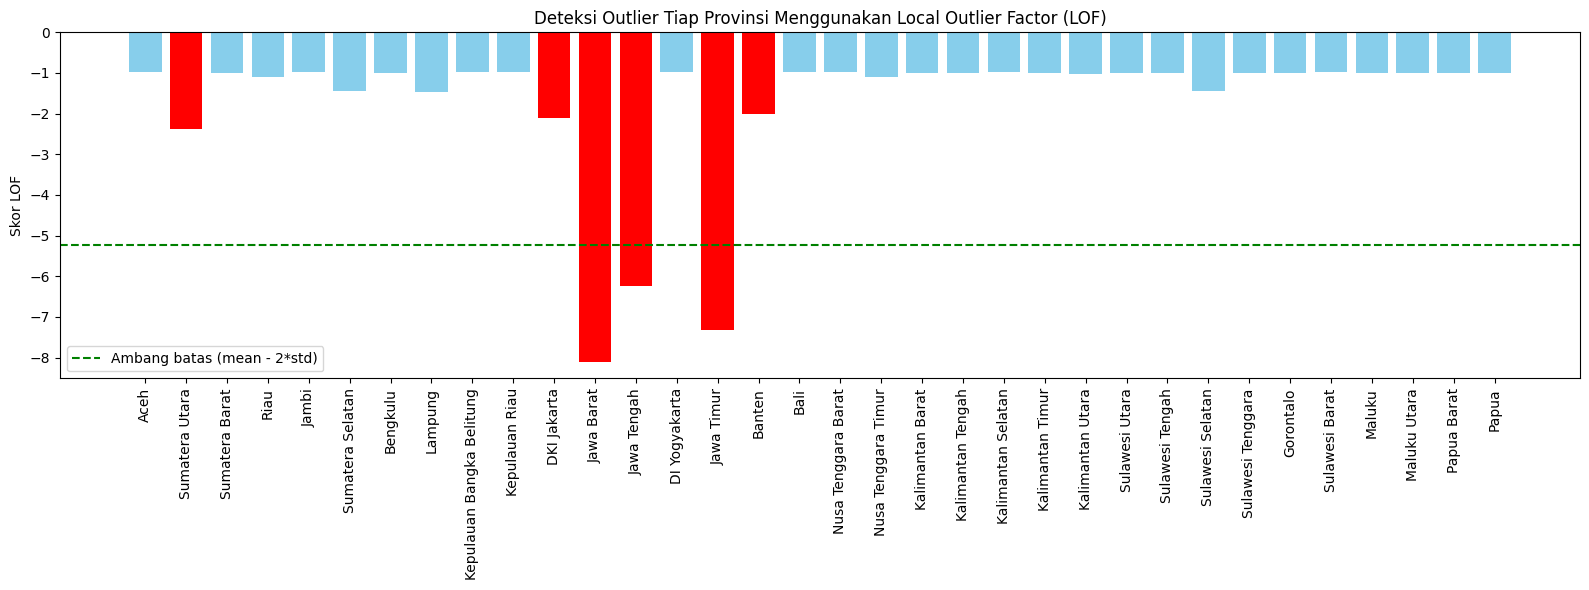

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Ambil nama provinsi dari dataset
provinsi = data_kerja['Provinsi'].tolist()

# Asumsikan X_scaled sudah dihasilkan sebelumnya dengan StandardScaler
# Misalnya: X_scaled = scaler.fit_transform(data_numeric)

# Terapkan LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = lof.fit_predict(data)
lof_scores = lof.negative_outlier_factor_
outlier_indices = np.where(y_pred == -1)[0]

# Visualisasi
plt.figure(figsize=(16, 6))
colors = ['red' if i in outlier_indices else 'skyblue' for i in range(len(provinsi))]

plt.bar(provinsi, lof_scores, color=colors)
plt.axhline(y=np.mean(lof_scores) - 2 * np.std(lof_scores), color='green', linestyle='--', label='Ambang batas (mean - 2*std)')
plt.xticks(rotation=90)
plt.ylabel("Skor LOF")
plt.title("Deteksi Outlier Tiap Provinsi Menggunakan Local Outlier Factor (LOF)")
plt.tight_layout()
plt.legend()
plt.show()

## HDBSCAN

In [21]:
df_glosh = meta.copy()

In [22]:
import hdbscan

clusterer = hdbscan.HDBSCAN(
    min_samples=2,
    min_cluster_size=2,
    metric='euclidean',
    # algorithm='generic',
    # gen_min_span_tree=True
)
cluster_labels = clusterer.fit_predict(data)
df_glosh['cluster'] = cluster_labels

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
from sklearn.metrics import silhouette_score
mask = cluster_labels != -1  # Hilangkan noise
if len(set(cluster_labels[mask])) > 1:
    score = silhouette_score(data[mask], cluster_labels[mask])
    print(f"Silhouette Score (tanpa noise): {score:.3f}")
else:
    print("Tidak cukup klaster untuk menghitung Silhouette Score (harus >1 klaster tanpa noise).")

Silhouette Score (tanpa noise): 0.546


In [24]:
df_glosh[['Provinsi', 'cluster']]

,Provinsi,cluster
0,Aceh,2
1,Sumatera Utara,-1
2,Sumatera Barat,2
3,Riau,2
4,Jambi,2
5,Sumatera Selatan,1
6,Bengkulu,2
7,Lampung,1
8,Kepulauan Bangka Belitung,2
9,Kepulauan Riau,2


In [25]:
import pandas as pd

# Gabungkan berdasarkan Provinsi
df_merge = pd.merge(df_glosh, data_kerja, on="Provinsi")

# 1. Ringkasan jumlah & persentase provinsi per cluster
cluster_counts = df_merge['cluster'].value_counts().sort_index()
cluster_percent = df_merge['cluster'].value_counts(normalize=True).sort_index() * 100

summary_cluster = pd.DataFrame({
    "Jumlah Provinsi": cluster_counts,
    "Persentase (%)": cluster_percent.round(2)
})
print("📌 Ringkasan Klaster:")
print(summary_cluster, "\n")

# 2. Hitung distribusi variabel X1–X8 per cluster (pakai sum, karena data absolut)
cols_x = ["Usia Produktif", "<= SD/MI", "SMP/MTS", "SMA/SMK",
          "Perguruan Tinggi", "Primer", "Sekunder", "Tersier"]

# Jumlah total per cluster
cluster_sum = df_merge.groupby("cluster")[cols_x].sum()

# Hitung persentase dalam tiap cluster
cluster_percentage = cluster_sum.div(cluster_sum.sum(axis=1), axis=0) * 100

print("📌 Persentase Variabel X per Klaster:")
print(cluster_percentage.round(2), "\n")

# 3. Bandingkan cluster -1 (noise) dengan rata-rata cluster lainnya
if -1 in cluster_percentage.index:
    noise_profile = cluster_percentage.loc[-1]
    other_profile = cluster_percentage.drop(-1).mean()
    comparison = pd.DataFrame({
        "Noise (-1)": noise_profile,
        "Rata-rata Klaster Lain": other_profile,
        "Selisih (Noise - Lain)": (noise_profile - other_profile).round(2)
    })
    print("📌 Perbandingan Klaster -1 dengan Rata-rata Klaster Lain:")
    print(comparison.round(2))

📌 Ringkasan Klaster:
         Jumlah Provinsi  Persentase (%)
cluster                                 
-1                     3            8.82
 0                     3            8.82
 1                     3            8.82
 2                    25           73.53 

📌 Persentase Variabel X per Klaster:
         Usia Produktif  <= SD/MI  SMP/MTS  SMA/SMK  Perguruan Tinggi  Primer  \
cluster                                                                         
-1                37.67      9.17     6.48    16.09              5.93    6.37   
 0                36.74     15.33     6.78    10.94              3.68    8.25   
 1                36.13     14.41     6.66    10.82              4.25   15.10   
 2                36.66     13.66     5.87    11.95              5.18   13.72   

         Sekunder  Tersier  
cluster                     
-1           7.27    11.02  
 0           9.07     9.21  
 1           4.73     7.91  
 2           5.30     7.67   

📌 Perbandingan Klaster -1 denga

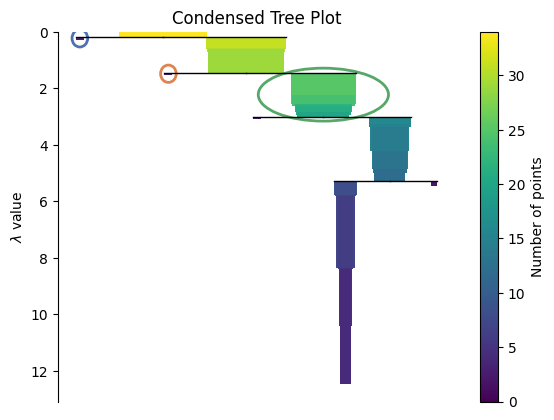

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan HDBSCAN dibentuk dengan gen_min_span_tree=True (sudah kamu lakukan)

# Buat plot condensed tree (mirip dendrogram)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette("deep"))
plt.title("Condensed Tree Plot")
plt.show()

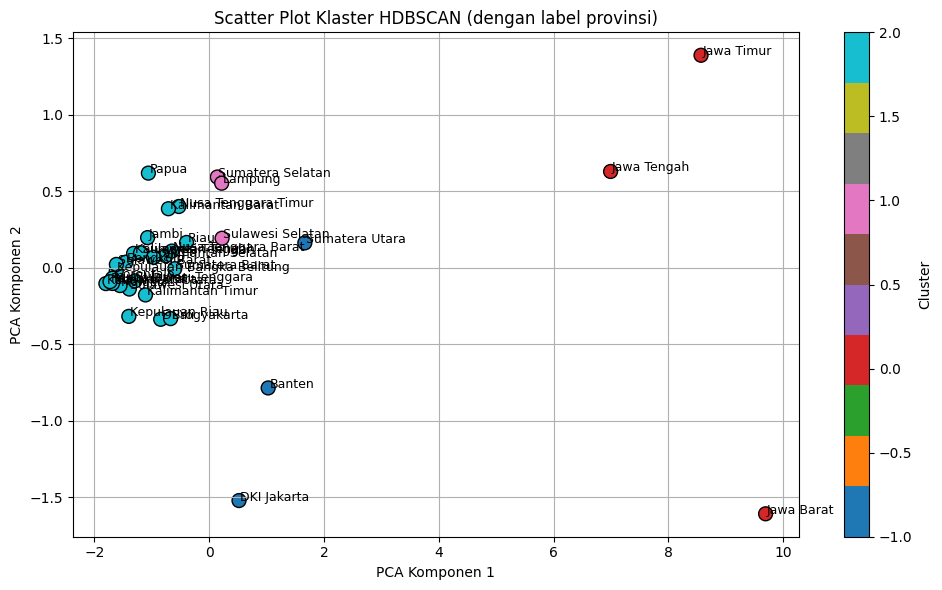

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# PCA untuk reduksi dimensi
pca = PCA(n_components=2)
reduced = pca.fit_transform(data)

# Dataframe gabungan
df_plot = pd.DataFrame({
    'PCA1': reduced[:, 0],
    'PCA2': reduced[:, 1],
    'cluster': clusterer.labels_,
    'Provinsi': data_kerja['Provinsi']  # nama provinsi kamu
})

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_plot['PCA1'], df_plot['PCA2'],
                      c=df_plot['cluster'], cmap='tab10', s=100, edgecolor='k')

# Tambahkan nama provinsi
for i in range(len(df_plot)):
    plt.text(df_plot['PCA1'][i]+0.02, df_plot['PCA2'][i], df_plot['Provinsi'][i], fontsize=9)

plt.title("Scatter Plot Klaster HDBSCAN (dengan label provinsi)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

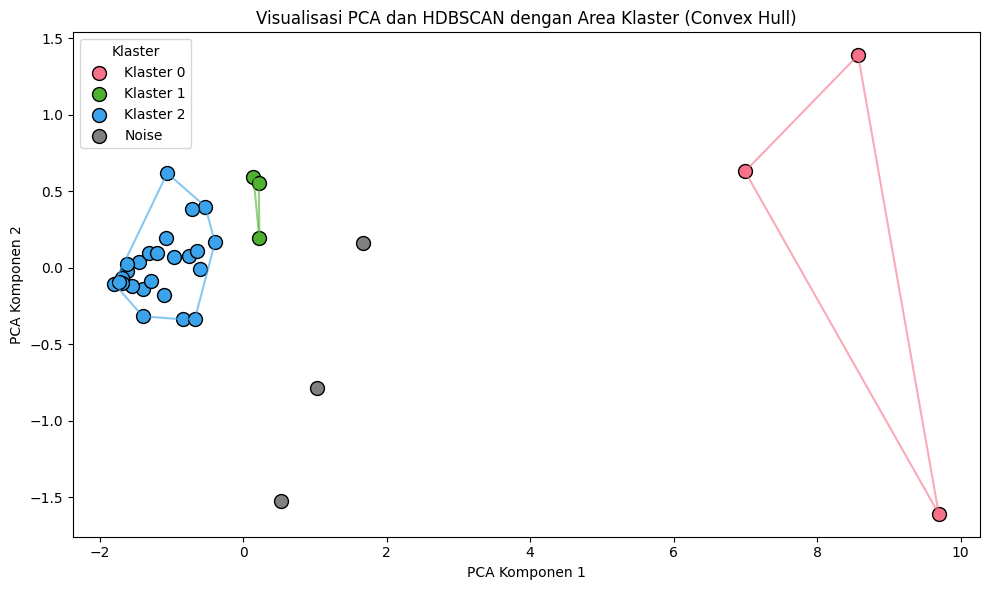

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull
import hdbscan

plt.figure(figsize=(10, 6))
unique_labels = set(cluster_labels)
palette = sns.color_palette("husl", len(unique_labels) - (1 if -1 in unique_labels else 0))

for label in unique_labels:
    idx = cluster_labels == label
    points = reduced[idx]

    if label == -1:
        plt.scatter(points[:, 0], points[:, 1], s=100, c='gray', label='Noise', edgecolor='k')
    else:
        color = palette[label]
        plt.scatter(points[:, 0], points[:, 1], s=100, color=color, label=f'Klaster {label}', edgecolor='k')

        if len(points) >= 3:
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], color=color, alpha=0.6)

plt.title("Visualisasi PCA dan HDBSCAN dengan Area Klaster (Convex Hull)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title='Klaster', loc='best')
# plt.grid(True)
plt.tight_layout()
plt.show()

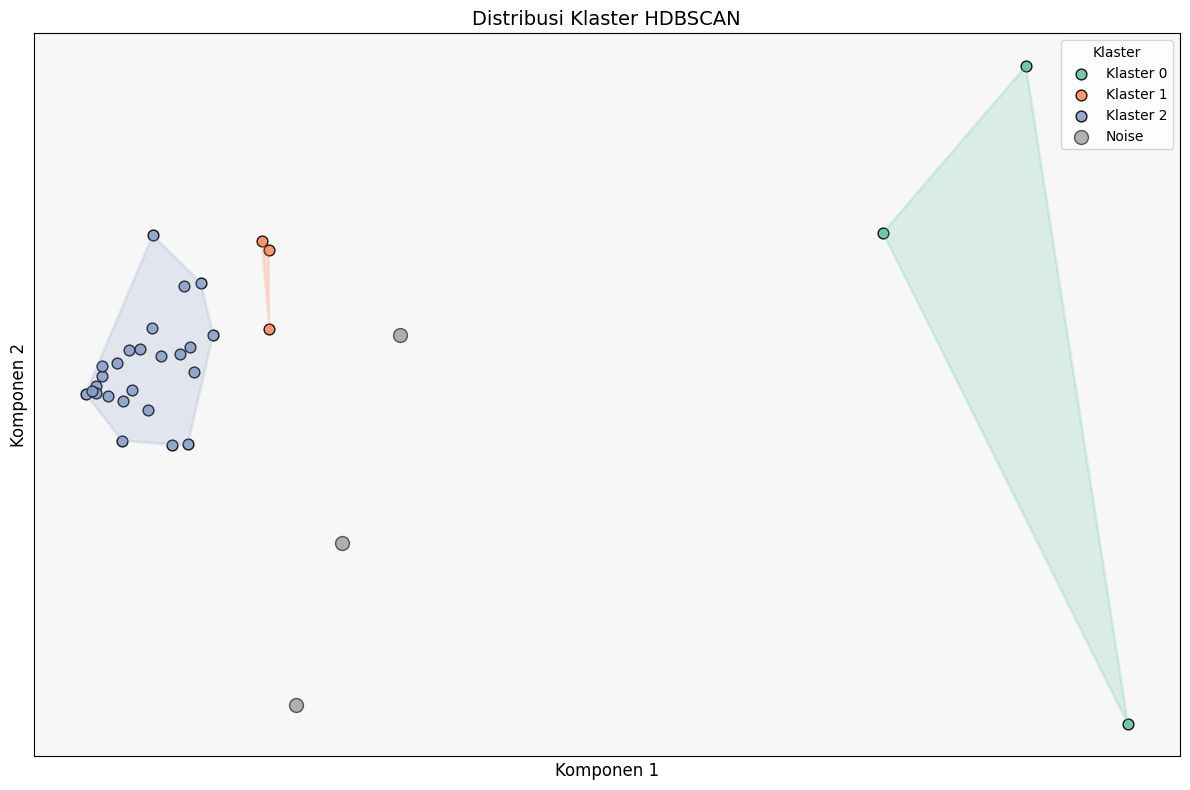

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
from scipy.spatial import ConvexHull
import numpy as np

plt.figure(figsize=(12, 8))
unique_labels = set(cluster_labels)
palette = sns.color_palette("Set2", len(unique_labels) - (1 if -1 in unique_labels else 0))

for label in unique_labels:
    idx = cluster_labels == label
    points = reduced[idx]

    if label == -1:
        # Noise
        plt.scatter(points[:, 0], points[:, 1], s=100, c='gray', label='Noise', edgecolor='k', alpha=0.6)
    else:
        color = palette[label]
        plt.scatter(points[:, 0], points[:, 1], s=60, color=color, edgecolor='k', label=f'Klaster {label}', alpha=0.9)

        if len(points) >= 3:
            hull = ConvexHull(points)
            hull_points = points[hull.vertices]
            polygon = Polygon(hull_points, closed=True, facecolor=color, alpha=0.2, edgecolor=color, linewidth=2)
            plt.gca().add_patch(polygon)

# Tambahan estetika seperti peta
plt.gca().set_facecolor('#f7f7f7')  # background putih abu-abu
plt.title("Distribusi Klaster HDBSCAN", fontsize=14)
plt.xlabel("Komponen 1", fontsize=12)
plt.ylabel("Komponen 2", fontsize=12)
plt.xticks([])
plt.yticks([])
plt.box(True)
plt.legend(title='Klaster', loc='best')
plt.tight_layout()
plt.show()

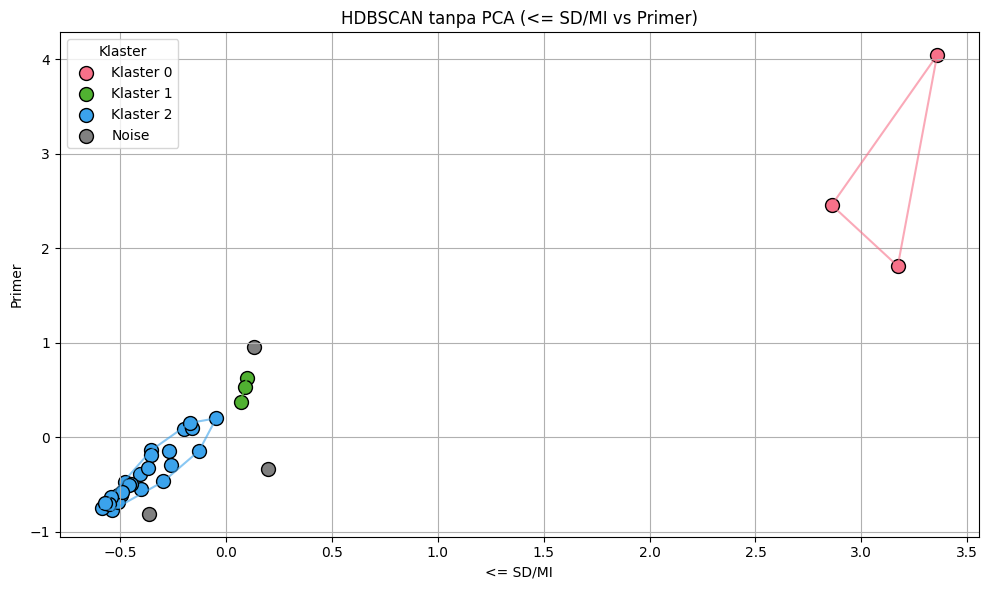

In [30]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import seaborn as sns

# Pilih 2 fitur asli dari data numerik
x_feature = '<= SD/MI'
y_feature = 'Primer'

X_vis = data[[x_feature, y_feature]].values
labels = df_glosh['cluster'].values
unique_labels = set(labels)

# Plot tanpa PCA
plt.figure(figsize=(10, 6))
palette = sns.color_palette("husl", len(unique_labels) - (1 if -1 in unique_labels else 0))

for label in unique_labels:
    idx = labels == label
    points = X_vis[idx]

    if label == -1:
        plt.scatter(points[:, 0], points[:, 1], s=100, c='gray', label='Noise', edgecolor='k')
    else:
        color = palette[label]
        plt.scatter(points[:, 0], points[:, 1], s=100, color=color, label=f'Klaster {label}', edgecolor='k')

        if len(points) >= 3:
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                plt.plot(points[simplex, 0], points[simplex, 1], color=color, alpha=0.6)

plt.title(f"HDBSCAN tanpa PCA ({x_feature} vs {y_feature})")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend(title='Klaster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Simpan Model

In [31]:
import pickle

# Simpan model ke file .pkl
with open("hdbscan_model.pkl", "wb") as f:
    pickle.dump(clusterer, f)


print("✅ Model berhasil disimpan")

✅ Model berhasil disimpan
